In [1]:
import pandas as pd

Problem Statement
         Given the plot of a movie, predict the genre of the movie.


In [2]:
df = pd.read_csv("wiki_movie_plots_deduped.csv")

In [3]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
import sqlite3
con = sqlite3.connect('movie_plots.db')

Cleaning function

In [5]:
import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [6]:
num_rows = len(df)
num_rows

34886

Sample based on the genre column. 

In [7]:
genres = df['Genre'].value_counts()
sorted_genres = genres.sort_values(ascending=False)
sorted_genres

unknown                            6083
drama                              5964
comedy                             4379
horror                             1167
action                             1098
                                   ... 
musical, social, drama, romance       1
vampire film                          1
epic film                             1
comedy, crime, romance                1
horror romantic comedy                1
Name: Genre, Length: 2265, dtype: int64

In [8]:
min_samples = 310
filtered_genres = genres[genres >= min_samples].index
filtered_genres

Index(['unknown', 'drama', 'comedy', 'horror', 'action', 'thriller', 'romance',
       'western', 'crime', 'adventure', 'musical', 'crime drama',
       'romantic comedy', 'science fiction', 'film noir', 'mystery'],
      dtype='object')

In [9]:
balanced_df = pd.DataFrame()
for genre  in filtered_genres:
     subset = df[df['Genre'] == genre].sample(min_samples, replace=True)
     balanced_df = pd.concat([balanced_df, subset], ignore_index=True)

balanced_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1992,Pattathu Raani,Tamil,Manivasagam,"Vijayakumar, Gouthami, Goundamani",unknown,https://en.wikipedia.org/wiki/Pattathu_Raani,Jalagandeswaran (Goundamani) and Rayappan (Sen...
1,2011,W.E.,British,Director: Madonna,"Director: Madonna\r\nCast: Abbie Cornish, Jame...",unknown,https://en.wikipedia.org/wiki/W.E.,"Wally Winthrop is a lonely housewife, living i..."
2,2012,The Rochdale Pioneers,British,Directors: Adam Lee Hamilton,"Directors: Adam Lee Hamilton, John Montegrande...",unknown,https://en.wikipedia.org/wiki/The_Rochdale_Pio...,The story is set in 1844 when a group of worki...
3,2011,Burning Man,British,Director: Jonathan Teplitzky,Director: Jonathan Teplitzky\r\nCast: Matthew ...,unknown,https://en.wikipedia.org/wiki/Burning_Man_(film),Burning Man tells the story of Tom (Matthew Go...
4,1997,Rakshakudu,Telugu,Pravin Gandhi,"Nagarjuna Akkineni, Sushmita Sen, S. P. Balasu...",unknown,https://en.wikipedia.org/wiki/Rakshakudu,Ajay (Nagarjuna) is an unemployed youth who al...


In [10]:
df = balanced_df

In [11]:
df["plot_clean"] = ''

In [12]:
col_types = df.dtypes
col_types

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
plot_clean          object
dtype: object

In [13]:
for i, row in df.iterrows():
    df.at[i, "plot_clean"] = clean(row.Plot)

In [14]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,plot_clean
0,1992,Pattathu Raani,Tamil,Manivasagam,"Vijayakumar, Gouthami, Goundamani",unknown,https://en.wikipedia.org/wiki/Pattathu_Raani,Jalagandeswaran (Goundamani) and Rayappan (Sen...,Jalagandeswaran (Goundamani) and Rayappan (Sen...
1,2011,W.E.,British,Director: Madonna,"Director: Madonna\r\nCast: Abbie Cornish, Jame...",unknown,https://en.wikipedia.org/wiki/W.E.,"Wally Winthrop is a lonely housewife, living i...","Wally Winthrop is a lonely housewife, living i..."
2,2012,The Rochdale Pioneers,British,Directors: Adam Lee Hamilton,"Directors: Adam Lee Hamilton, John Montegrande...",unknown,https://en.wikipedia.org/wiki/The_Rochdale_Pio...,The story is set in 1844 when a group of worki...,The story is set in 1844 when a group of worki...
3,2011,Burning Man,British,Director: Jonathan Teplitzky,Director: Jonathan Teplitzky\r\nCast: Matthew ...,unknown,https://en.wikipedia.org/wiki/Burning_Man_(film),Burning Man tells the story of Tom (Matthew Go...,Burning Man tells the story of Tom (Matthew Go...
4,1997,Rakshakudu,Telugu,Pravin Gandhi,"Nagarjuna Akkineni, Sushmita Sen, S. P. Balasu...",unknown,https://en.wikipedia.org/wiki/Rakshakudu,Ajay (Nagarjuna) is an unemployed youth who al...,Ajay (Nagarjuna) is an unemployed youth who al...


NLP

Load spacy

In [15]:
import spacy 
nlp = spacy.load("en_core_web_sm")

Perform NLP on the dataset

In [16]:
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["plot_clean"] and len(str(row["plot_clean"])) < 1000000):
        doc = nlp(str(row["plot_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "plot_lemma"] = " ".join(lemmas)                
        df.at[i, "plot_nouns"] = " ".join(nouns)
        df.at[i, "plot_adjectives"] = " ".join(adjectives)
        df.at[i, "plot_verbs"] = " ".join(verbs)
        df.at[i, "plot_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000


In [17]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,plot_clean,plot_lemma,plot_nouns,plot_adjectives,plot_verbs,plot_nav,no_tokens
0,1992,Pattathu Raani,Tamil,Manivasagam,"Vijayakumar, Gouthami, Goundamani",unknown,https://en.wikipedia.org/wiki/Pattathu_Raani,Jalagandeswaran (Goundamani) and Rayappan (Sen...,Jalagandeswaran (Goundamani) and Rayappan (Sen...,Jalagandeswaran ( Goundamani ) and Rayappan ( ...,Jalagandeswaran Goundamani Rayappan Senthil br...,small vacant beautiful married middle aged new...,refuse pay know build have rent move befriend ...,Jalagandeswaran Goundamani Rayappan Senthil br...,131.0
1,2011,W.E.,British,Director: Madonna,"Director: Madonna\r\nCast: Abbie Cornish, Jame...",unknown,https://en.wikipedia.org/wiki/W.E.,"Wally Winthrop is a lonely housewife, living i...","Wally Winthrop is a lonely housewife, living i...","Wally Winthrop be a lonely housewife , live in...",Wally Winthrop housewife New York City husband...,lonely psychiatrist new mutual other bad vitro...,live neglect find travel showcase use reminisc...,Wally Winthrop housewife New York City husband...,615.0
2,2012,The Rochdale Pioneers,British,Directors: Adam Lee Hamilton,"Directors: Adam Lee Hamilton, John Montegrande...",unknown,https://en.wikipedia.org/wiki/The_Rochdale_Pio...,The story is set in 1844 when a group of worki...,The story is set in 1844 when a group of worki...,the story be set in 1844 when a group of worki...,story group working class people town Rochdale...,unfair dishonest corrupt poor high own few eno...,set come change live sell decide take pool hav...,story group working class people town Rochdale...,134.0
3,2011,Burning Man,British,Director: Jonathan Teplitzky,Director: Jonathan Teplitzky\r\nCast: Matthew ...,unknown,https://en.wikipedia.org/wiki/Burning_Man_(film),Burning Man tells the story of Tom (Matthew Go...,Burning Man tells the story of Tom (Matthew Go...,burn Man tell the story of Tom ( Matthew Goode...,Man story Tom Matthew Goode chef Bondi restaur...,british different different,burn tell seem choose disobey tolerate descend...,Man story Tom Matthew Goode chef Bondi restaur...,80.0
4,1997,Rakshakudu,Telugu,Pravin Gandhi,"Nagarjuna Akkineni, Sushmita Sen, S. P. Balasu...",unknown,https://en.wikipedia.org/wiki/Rakshakudu,Ajay (Nagarjuna) is an unemployed youth who al...,Ajay (Nagarjuna) is an unemployed youth who al...,Ajay ( Nagarjuna ) be an unemployed youth who ...,Ajay Nagarjuna youth trouble temper man crime ...,unemployed angry young own free unhappy good r...,get heat encounter commit take beat give work ...,Ajay Nagarjuna youth trouble temper man crime ...,784.0


Save to database

In [19]:
#df.to_sql('plot_nlp1', con)

In [20]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

Library import & Settings

In [21]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [22]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

Basic Properties of the dataset

In [23]:
df.dtypes

Release Year        int64  
Title               object 
Origin/Ethnicity    object 
Director            object 
Cast                object 
Genre               object 
Wiki Page           object 
Plot                object 
plot_clean          object 
plot_lemma          object 
plot_nouns          object 
plot_adjectives     object 
plot_verbs          object 
plot_nav            object 
no_tokens           float64
dtype: object

In [24]:
# select a sample of some data frame columns
df[['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre']] \
  .sample(4, random_state=42)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre
3135,1944,Machine Gun Mama,American,Harold Young,Armida,musical
2191,1934,The Lawless Frontier,American,Robert N. Bradbury,"John Wayne, Sheila Terry",western
1295,2005,Namma Basava,Kannada,Veera Shankar,"Puneeth Rajkumar, Gowri Munjal, Sudharani, Tara, Kota Srinivasa Rao",action
2902,2007,The Hunting Party,American,Richard Shepard,"Terrence Howard, Richard Gere",adventure


In [25]:
len(df)

4960

In [26]:
df.count()

Release Year        4960
Title               4960
Origin/Ethnicity    4960
Director            4960
Cast                4879
Genre               4960
Wiki Page           4960
Plot                4960
plot_clean          4960
plot_lemma          4960
plot_nouns          4960
plot_adjectives     4960
plot_verbs          4960
plot_nav            4960
no_tokens           4960
dtype: int64

In [27]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release Year      4960 non-null   int64  
 1   Title             4960 non-null   object 
 2   Origin/Ethnicity  4960 non-null   object 
 3   Director          4960 non-null   object 
 4   Cast              4879 non-null   object 
 5   Genre             4960 non-null   object 
 6   Wiki Page         4960 non-null   object 
 7   Plot              4960 non-null   object 
 8   plot_clean        4960 non-null   object 
 9   plot_lemma        4960 non-null   object 
 10  plot_nouns        4960 non-null   object 
 11  plot_adjectives   4960 non-null   object 
 12  plot_verbs        4960 non-null   object 
 13  plot_nav          4960 non-null   object 
 14  no_tokens         4960 non-null   float64
dtypes: float64(1), int64(1), object(13)
memory usage: 56.3 MB


 Exploring Column Summaries

In [28]:
Summary for Categorical Features

SyntaxError: invalid syntax (1133278068.py, line 1)

In [29]:
columns = [col for col in df.columns if not col.startswith('plot')]
columns

['Release Year',
 'Title',
 'Origin/Ethnicity',
 'Director',
 'Cast',
 'Genre',
 'Wiki Page',
 'Plot',
 'no_tokens']

In [30]:
# describe categorical columns of type np.object 
df[columns] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
Title,4960,3959,Road House,5
Origin/Ethnicity,4960,23,American,3272
Director,4960,2439,Unknown,61
Cast,4879,3911,"Basil Rathbone, Nigel Bruce",8
Genre,4960,16,unknown,310
Wiki Page,4960,4008,https://en.wikipedia.org/wiki/Mr._Satan_(film),5
Plot,4960,4005,"News correspondent Tim Garnett (Stephenson) and his photographer Connelly (Richard ""Skeets"" Gallagher) have been on assignment in a country on the edge of revolution. At the airport as they wait to leave, Connelly snaps a throwaway shot of an attractive woman boarding a plane. When the photograph is developed, they realise that the woman's male companion is Emile Zubova (Franklin Dyall), a notorious illegal arms dealer who had recently been reported as having committed suicide while on the run from agents wishing to track him down.\r\nConnelly and Garnett start to investigate their scoop, but as they do so word gets back to Zubova that he has been photographed. Connelly and Garnett manage to identify the woman in the picture, Jacqueline Manet (Bouchier), and trace her movements to France. As they fly out, Zubova arranges to have their plane shot down in order to silence them. The plane crashes, but both survive relatively unscathed. Garnett locates Jacqueline and follows her, hoping she will lead him to Zubova. She realises she is being tailed and challenges Garnett. However the confrontation soon turns into mutual attraction and then love.\r\nHaving been informed of the dangerous situation by his lookout minions, Zubova has Garnett kidnapped and brought to his hideout, where plans are being made to torpedo an ocean liner in order to provoke another war from which Zubova can profit. Jacqueline arrives at the hideout and shoots Zubova during a struggle, but is herself fatally wounded in return and dies in Garnett's arms. Garnett is able to alert the authorities of the plot to sink the liner, the navy are put on hand to deal with the threat, and the submarine is destroyed.",5


In [31]:
df['Genre'].value_counts()[:10]

unknown      310
drama        310
comedy       310
horror       310
action       310
thriller     310
romance      310
western      310
crime        310
adventure    310
Name: Genre, dtype: int64

Exploring Text Categories

Normalize column names

In [32]:
df.columns = df.columns.str.lower()  # 
df.columns = df.columns.str.replace(' ', '_')  
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True) 

In [33]:
df.columns

Index(['release_year', 'title', 'originethnicity', 'director', 'cast', 'genre',
       'wiki_page', 'plot', 'plot_clean', 'plot_lemma', 'plot_nouns',
       'plot_adjectives', 'plot_verbs', 'plot_nav', 'no_tokens'],
      dtype='object')

In [34]:
df['genre'].nunique()

16

In [35]:
Exploring Word Frequencies

SyntaxError: invalid syntax (1220459344.py, line 1)

In [36]:
# create a data frame slice
sub_df = df[df['genre']=='western']
# sample cleaned text and tokens tagged as nouns
sub_df[['plot_clean', 'plot_nouns']].sample(2)

plot_clean  \
2412  In the early years of the twentieth century, an aging ex-lawman, Steve Judd (Joel McCrea), is hired to guard a shipment of gold from a high country mining camp to the town of Hornitos, California. Six miners were recently murdered trying to transport their gold on the one trail leading down from the crest of the Sierra Nevada. In his prime, Judd was a tough and respected lawman, but now his threadbare clothes and spectacles serve as reminders that he is long past his prime. Judd enlists the help of his old friend and partner Gil Westrum (Randolph Scott) to guard the gold shipment. Gil, who makes his living passing himself off as a legendary sharpshooter named The Oregon Kid, enlists the help of his young sidekick, Heck Longtree (Ron Starr).\r\nJudd, Gil, and Heck ride up into the mountains toward the Coarse Gold mining camp. Judd doesn't know that Gil and Heck are planning to steal the gold for themselves—preferably with Judd's help, but without it if necessary. Along the way they stop for the night at the farm of Joshua Knudsen (R. G. Armstrong) and his daughter Elsa (Mariette Hartley). Knudsen is a domineering religious man who warns against those who "traffic in gold" and trades Bible verses with Judd at the dinner table. That night, Elsa and Heck meet in the moonlight, but Knudsen interrupts their conversation. Back at the house, he admonishes and slaps her for her behavior. Unable to tolerate her domineering father any longer, Elsa leaves her home the next morning. She later joins Judd, Gil, and Heck on their ride to Coarse Gold where she intends to marry her fiancé. Along the way she and Heck flirt and he tries to force himself on her but is stopped by Judd.\r\nWhen they reach the Coarse Gold mining camp, they soon discover that the girl's fiancé, Billy Hammond (James Drury), is a drunken lout who intends to prostitute her to his four thuggish brothers, Elder (John Anderson), Sylvus (L. Q. Jones), Jimmy (John Davis Chandler) and Henry (Warren Oates). Judd and Heck rescue the girl from the marriage, and the next morning, Judd, Gil, Heck and Elsa start back towards town with the gold. Along the way, Judd talks to Gil about right and wrong and how that's "something you just know." After all the lost years working in disreputable places, he tells Gil that he's now grateful to have gained back some of his self-respect and intends on keeping it "with the help of you and that boy back there." When Gil asks if that's all he wants, Judd replies, "All I want is to enter my House justified."\r\nRealizing Judd will never go along with his plan to steal the gold, Gil plans to steal the gold without his help. During the night as Gil and Heck prepare to leave with the gold, Judd confronts them at gunpoint. Angered by his old friend's betrayal, he slaps him and challenges him to a draw, but Gil throws down his guns. Planning to put them on trial when they return to town, Judd is forced to change his plans when the Hammond brothers appear in hot pursuit of the girl. In the ensuing gunfight, two of the brothers, Jimmy and Sylvus, are killed, and Billy, Elder and Henry escape.\r\nDuring the night, Gil leaves camp and heads back to the site of the gunfight, where he takes a horse and gun from one of the dead brothers . Then he follows Judd, Heck, and Elsa down the only trail. Meanwhile, Heck has shown himself to be trustworthy, and even though he will most likely go to prison, Elsa tells him she'll be there when he gets out. When they reach Elsa's farm, the Hammond brothers are waiting, having already killed her father. A gunfight breaks out and soon both Judd and Heck are wounded. Just then Gil comes riding in to help his old friend, and together the pair insult and challenge the brothers to a face-to-face shootout in the open. When the dust settles, the three brothers are dead, but Judd is mortally wounded. He tells his old friend, "I don't want them to see this. I want to go it alone." When Gil pledges to take care of

Creating a list of tokens from a list of documents

In [37]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [38]:
# transform list of documents into a single list of tokens
tokens = sub_df.plot_nouns.map(my_tokenizer).sum()

In [39]:
print(tokens[:200])

['Lawyer', 'Mitch', 'Baker', 'office', 'United', 'States', 'Secret', 'Service', 'father', 'border', 'town', 'Mission', 'Texas', 'Newton', 'informer', 'mission', 'group', 'gunrunner', 'Newton', 'Raiders', 'force', 'Emperor', 'Maximilian', 'Mexico', 'weapon', 'ire', 'United', 'States', 'Republican', 'Mexico', 'father', 'badge', 'pistol', 'Mitch', 'pistol', 'revenge', 'mission', 'Mission', 'Mitch', 'guise', 'gunslinger', 'credential', 'Newton', 'man', 'sheriff', 'office', 'force', 'Mr', 'Simmons', 'Reverend', 'Gospel', 'simmon', 'child', 'shelter', 'child', 'father', 'mother', 'Angelita', 'dancer', 'saloon', 'Angelita', 'love', 'Mitch', 'one', 'town', 'Mitch', 'child', 'Archangel', 'Mitch', 'table', 'assassination', 'attempt', 'Newton', 'revenge', 'Newton', 'Marshal', 'Evans', 'Mitch', 'father', 'Mitch', 'father', 'Mitch', 'murder', 'Newton', 'man', 'Angelita', 'Simons', 'Mitch', 'mission', 'Marshal', 'Evans', 'Newton', 'Newton', 'gang', 'rider', 'cowboy', 'Gene', 'Autry', 'Gene', 'Autry'

Counting Frequencies with a Counter

In [40]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('man', 463),
 ('town', 390),
 ('gang', 223),
 ('Gene', 203),
 ('horse', 182),
 ('gun', 173),
 ('ranch', 169),
 ('father', 157),
 ('Jim', 150),
 ('money', 146),
 ('brother', 146),
 ('son', 139),
 ('gold', 137),
 ('John', 130),
 ('Martin', 129),
 ('friend', 126),
 ('sheriff', 124),
 ('way', 113),
 ('George', 112),
 ('time', 107)]

In [41]:
df.genre.unique()

array(['unknown', 'drama', 'comedy', 'horror', 'action', 'thriller',
       'romance', 'western', 'crime', 'adventure', 'musical',
       'crime drama', 'romantic comedy', 'science fiction', 'film noir',
       'mystery'], dtype=object)

In [42]:
print([t[0] for t in counter.most_common(200)])  

['man', 'town', 'gang', 'Gene', 'horse', 'gun', 'ranch', 'father', 'Jim', 'money', 'brother', 'son', 'gold', 'John', 'Martin', 'friend', 'sheriff', 'way', 'George', 'time', 'wife', 'cattle', 'Sam', 'land', 'bank', 'outlaw', 'woman', 'robbery', 'Tom', 'Mexico', 'life', 'plan', 'family', 'year', 'rancher', 'death', 'posse', 'day', 'night', 'Kid', 'Lee', 'James', 'train', 'Joe', 'owner', 'daughter', 'help', 'Jeff', 'stagecoach', 'gunman', 'soldier', 'hand', 'Billy', 'Roy', 'Texas', 'group', 'murder', 'Indians', 'war', 'love', 'camp', 'Charlie', 'girl', 'job', 'Karl', 'fight', 'order', 'Rocklin', 'Army', 'Frank', 'Barbarosa', 'mine', 'Kipp', 'Confederate', 'Gant', 'company', 'home', 'husband', 'mother', 'boy', 'attack', 'Jesse', 'cowboy', 'deputy', 'townspeople', 'Johnny', 'Max', 'road', 'wagon', 'child', 'Apache', 'Sheriff', 'Brian', 'Hondo', 'Dan', 'War', 'Judd', 'Gil', 'Carter', 'Kip', 'jail', 'house', 'Jack', 'Tex', 'area', 'party', 'leader', 'body', 'robber', 'other', 'saloon', 'Ben',

In [43]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

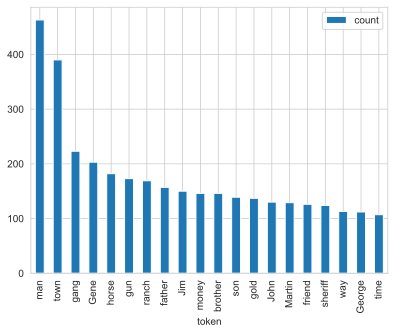

In [44]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

Using word Clouds

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

In [46]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

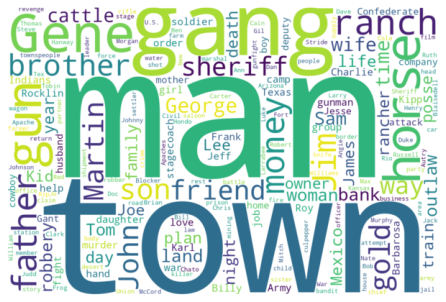

In [47]:
# create wordcloud
wordcloud(counter)

Comparing to Musical

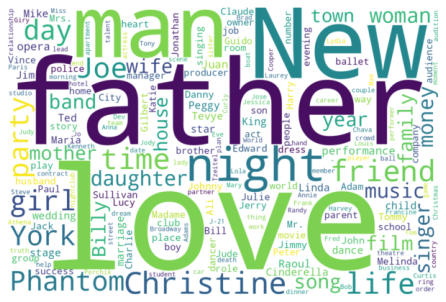

In [48]:
tokens2 = df[df['genre']=='musical'].plot_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

Exploring Text Complexity

In [49]:
df['no_tokens'] = df.plot_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

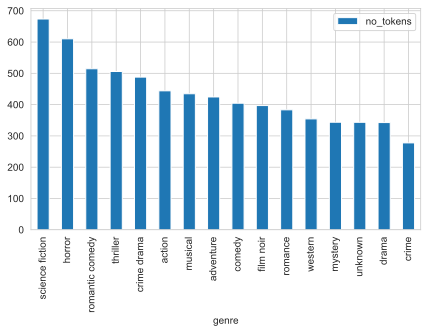

In [50]:
#mean number of tokens by category
df.groupby(['genre']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [51]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

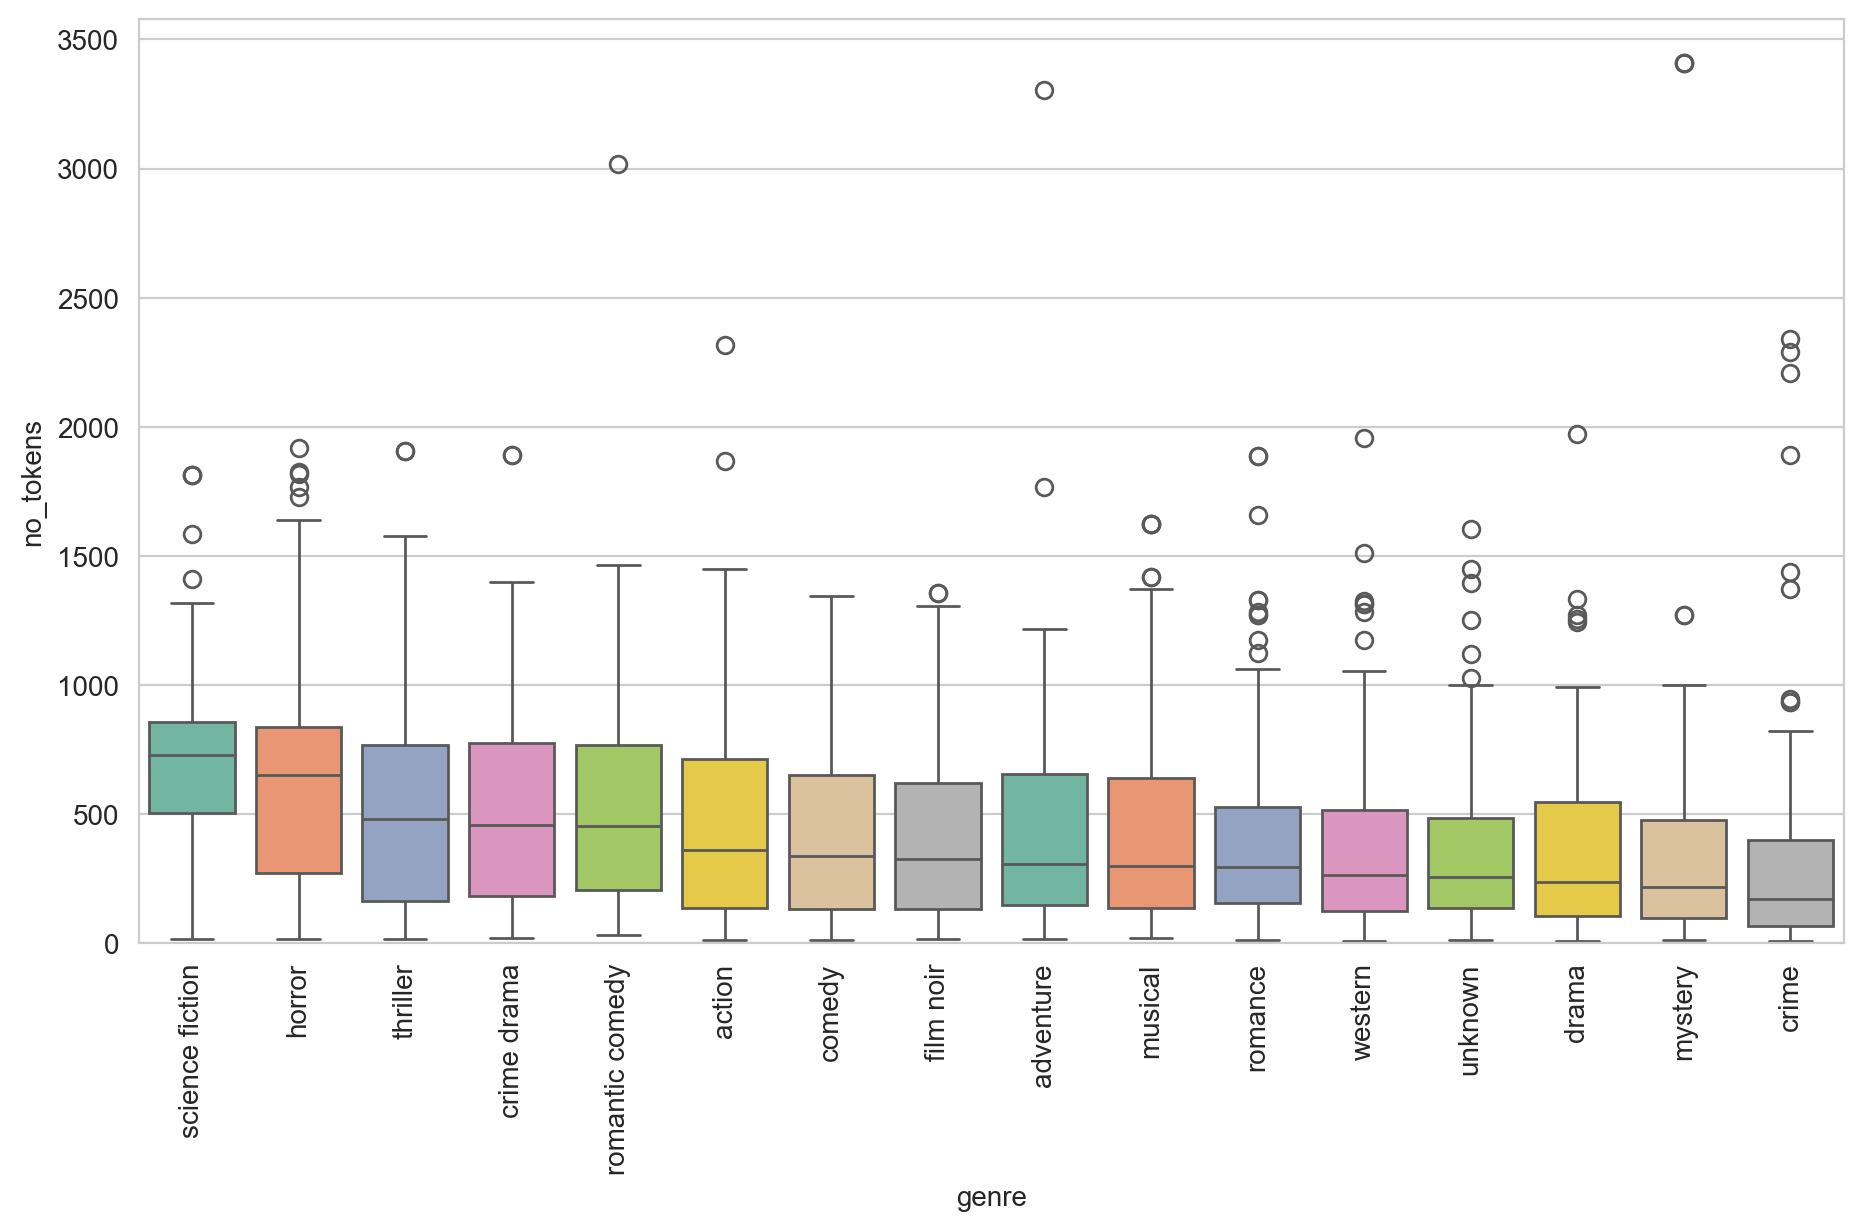

In [52]:
multi_boxplot(df, 'genre', 'no_tokens');

#print text of outliers


In [53]:
df['plot_lemma'][df.no_tokens > 2500]

2821    somewhere on one of the English - speak South Sea Islands , at an indefinite present time , with no mention of the fact that it be the middle of World War II , Marge ( Gale Sondergaard ) be the proprietress of a nightclub / restaurant / gambling hall / brothel call " Isle of Forgotten Sins " . in the morning , she knock on the door of the individual room of her sleeping hostess , Olga ( Betty Amann ) , Bobbie ( Patti McCarty ) , Mimi ( Marian Colby ) , and Christine ( Tala Birell ) announce , " get up , the Southern Queen be here " . ride in a launch from the ship be an inspector from the " Criminal Investigation Bureau " who compare a fingerprint card with a photograph of " Betty Nelson " to one with a photo of a somewhat old " Marge Williams " , show it to the commissioner ( unbille C. Montague Shaw ) and tell he , " we will go there tonight " . Marge , surround by eight hostess , be ask by one , " what can we do to please he ? " and answer , " he do not want to be pleased , 

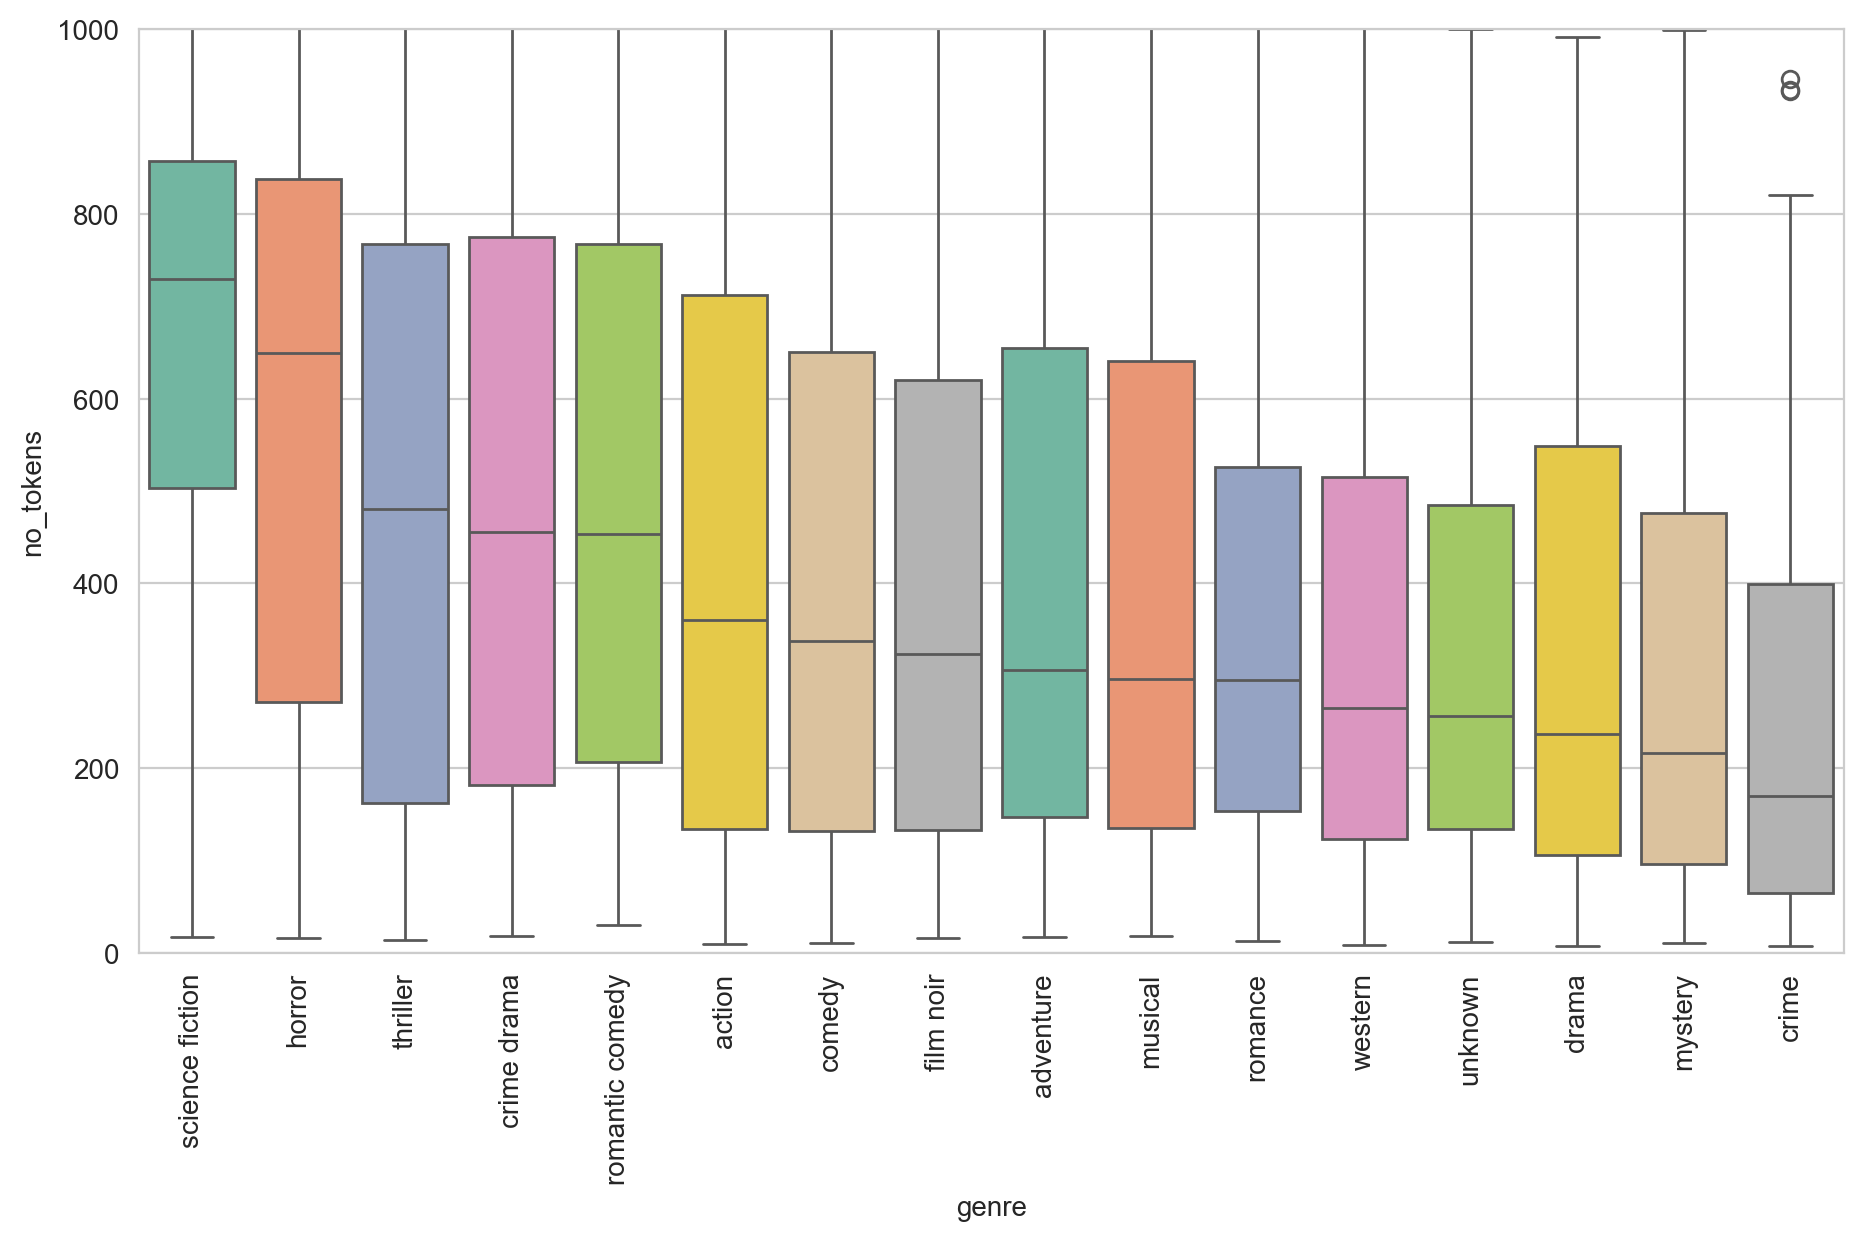

In [55]:
# cut-off diagram at y=500
multi_boxplot(df, 'genre', 'no_tokens', ylim=1000)